In [15]:
import numpy as np
import matplotlib.pyplot as plt
import hecompa_visual as hvis
import ipywidgets as widgets

In [18]:
def ejemplo(Lx = 2.0, Ly = 1.0, Nx = 9, Ny =4):
    # Tamaño de la malla en cada dirección
    hx = Lx / (Nx+1)
    hy = Ly / (Ny+1)

    # Número total de nodos incluyendo las fronteras
    NxT = Nx + 2
    NyT = Ny + 2

    # Coordenadas de la malla
    xn = np.linspace(0,Lx,NxT)
    yn = np.linspace(0,Ly,NyT)

    # Generación de una rejilla
    xg, yg = np.meshgrid(xn, yn, indexing='ij')
    
    # Definición de un campo escalar en cada punto de la malla
    T = np.zeros((NxT, NyT))

    # Asignamos un valor a cada entrada del arreglo
    for i in range(NxT):
        for j in range(NyT):
            T[i,j] = np.sin(i*j)
            
    # Definición del campo vectorial (en este caso dos valores por nodo)
    v = np.zeros((2, NxT, NyT))

    # Creamos un campo vectorial con las siguientes fórmulas
    A = 1.0
    alpha_x = 1.0
    alpha_y = 1.0
    v[0] = -A * np.cos(np.pi * alpha_y * yg / Ly) * np.sin(np.pi * alpha_x * xg / Lx)
    v[1] =  A * np.sin(np.pi * alpha_y * yg / Ly) * np.cos(np.pi * alpha_x * xg / Lx)
    
    # Creación de tres gráficas
    fig, ax = plt.subplots(3,1, figsize=(10,10))

    # Primera gráfica: la malla
    cax0 = hvis.set_canvas(ax[0], Lx, Ly)
    hvis.plot_mesh(ax[0], xg, yg)

    # Segunda gráfica: campo escalar T
    cax1 = hvis.set_canvas(ax[1], Lx, Ly)
    cu = ax[1].contourf(xg, yg, T, levels=50, cmap='inferno')
    fig.colorbar(cu, cax=cax1, ticks=[-0.9, 0.0, 0.9], orientation='vertical')

    # Tercera gráfica: campo vectorial V
    cax2 = hvis.set_canvas(ax[2], Lx, Ly)
    cu = ax[2].quiver(xg, yg, v[0], v[1])
    hvis.plot_frame(ax[2],xn,yn)

    plt.show()  

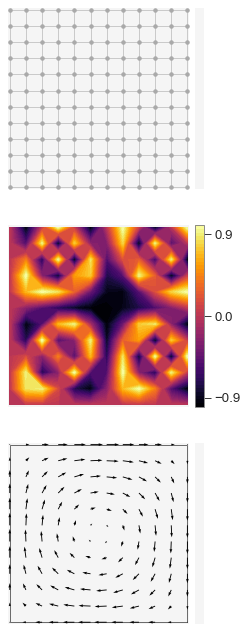

In [19]:
ejemplo(Lx = 1.0, Ly = 1.0, Nx = 10, Ny = 10)

In [22]:
widgets.interactive(ejemplo)

interactive(children=(FloatSlider(value=2.0, description='Lx', max=6.0, min=-2.0), FloatSlider(value=1.0, desc…